In [17]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as fig
from census import Census
import requests
from datetime import datetime


# Census API key
from config import api_key

# Access raw housing data

metro_hv_df = pd.read_csv("Data/Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv")
metro_inventory_df = pd.read_csv("Data/Metro_invt_fs_uc_sfr_sm_month.csv")
zipcode_hv_df = pd.read_csv("Data/Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv")

# Filter all the dataframes to select only Atlanta Metro

metro_hv_df = metro_hv_df.loc[metro_hv_df["RegionName"] == "Atlanta, GA"]
metro_inventory_df = metro_inventory_df.loc[metro_inventory_df["RegionName"] == "Atlanta, GA"]
zipcode_hv_df = zipcode_hv_df.loc[zipcode_hv_df["Metro"] == "Atlanta-Sandy Springs-Roswell"]

In [2]:
metro_hv_df

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/1996,2/29/1996,3/31/1996,4/30/1996,5/31/1996,...,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021
9,394347,9,"Atlanta, GA",Msa,GA,123356.0,123589.0,123815.0,124314.0,124804.0,...,257205,259824,262855,266279,269915,273947,278358,283482,289553,296585


In [3]:
metro_inventory_df

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021
9,394347,9,"Atlanta, GA",Msa,GA,27491,26389,27430,28736,30231,...,31212.0,29810.0,27749,25499,23563.0,21799.0,21357.0,20424.0,20746.0,21329.0


In [4]:
zipcode_hv_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/1996,...,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021
36,71067,37,30349,Zip,GA,GA,Riverdale,Atlanta-Sandy Springs-Roswell,Clayton County,101049.0,...,173192,175092,177039,179313,181593,184321,187589,191315,195593,200055
51,70829,52,30044,Zip,GA,GA,Lawrenceville,Atlanta-Sandy Springs-Roswell,Gwinnett County,117320.0,...,232282,235282,238202,241419,245063,249666,254447,259789,266046,273778
57,70828,58,30043,Zip,GA,GA,Lawrenceville,Atlanta-Sandy Springs-Roswell,Gwinnett County,137812.0,...,269260,272660,276000,279810,284199,289620,295337,301752,309502,318962
64,70874,65,30096,Zip,GA,GA,Duluth,Atlanta-Sandy Springs-Roswell,Gwinnett County,125175.0,...,267723,270830,273698,277059,281030,286211,291781,297841,305055,313602
68,70810,69,30024,Zip,GA,GA,Suwanee,Atlanta-Sandy Springs-Roswell,Gwinnett County,189934.0,...,385998,389679,393932,398708,404112,410824,418020,426334,436153,448204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23954,70944,25206,30177,Zip,GA,GA,Tate,Atlanta-Sandy Springs-Roswell,Pickens County,73334.0,...,150684,150827,151907,153187,154883,155815,156790,157333,158274,159285
24942,70888,26329,30111,Zip,GA,GA,Austell,Atlanta-Sandy Springs-Roswell,Cobb County,57977.0,...,158907,160941,163740,166334,168236,171570,175838,182894,190439,197758
27312,71239,29167,30623,Zip,GA,GA,Madison,Atlanta-Sandy Springs-Roswell,Morgan County,NaN,...,175878,176562,178679,180283,182176,183376,184530,185790,187208,189575
27574,70924,29472,30151,Zip,GA,GA,Nelson,Atlanta-Sandy Springs-Roswell,Pickens County,NaN,...,62653,62646,63214,63772,64092,64046,64444,65498,67434,69835


In [5]:
# Drop everything except monthly numbers
# del metro_inventory_df.iloc[0:4]
# del metro_inventory_df['SizeRank']
just_dates = metro_inventory_df.drop(metro_inventory_df.iloc[:,0:5], inplace = False, axis =1)
just_dates

,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,...,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021
9,27491,26389,27430,28736,30231,31503,32725,33643,33538,33288,...,31212.0,29810.0,27749,25499,23563.0,21799.0,21357.0,20424.0,20746.0,21329.0


In [6]:
# Months list
date = just_dates.iloc[0,0:42].index.values
date
listings = just_dates.iloc[0,0:42].values

months2 = []

for x in date:
    my_date = datetime.strptime(x, "%m/%d/%Y")
    my_date = my_date.strftime("%b") +" "+ str(my_date.year)
    months2.append(my_date)
months2

['Jan 2018',
 'Feb 2018',
 'Mar 2018',
 'Apr 2018',
 'May 2018',
 'Jun 2018',
 'Jul 2018',
 'Aug 2018',
 'Sep 2018',
 'Oct 2018',
 'Nov 2018',
 'Dec 2018',
 'Jan 2019',
 'Feb 2019',
 'Mar 2019',
 'Apr 2019',
 'May 2019',
 'Jun 2019',
 'Jul 2019',
 'Aug 2019',
 'Sep 2019',
 'Oct 2019',
 'Nov 2019',
 'Dec 2019',
 'Jan 2020',
 'Feb 2020',
 'Mar 2020',
 'Apr 2020',
 'May 2020',
 'Jun 2020',
 'Jul 2020',
 'Aug 2020',
 'Sep 2020',
 'Oct 2020',
 'Nov 2020',
 'Dec 2020',
 'Jan 2021',
 'Feb 2021',
 'Mar 2021',
 'Apr 2021',
 'May 2021',
 'Jun 2021']

<IPython.core.display.Javascript object>


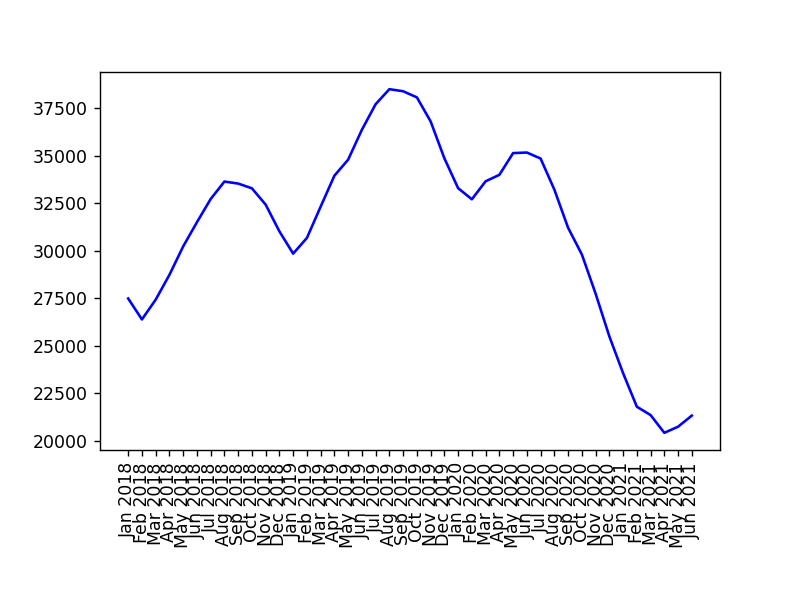

In [23]:
# Line chart for Home inventory by month

# listings.values

# Plot it
mo_avg_listings = plt.plot(months2, listings, color="blue", label="World Average")
plt.xticks(rotation=90)

# mo_avg_listings = plt.plot(metro_inventory_df, color="blue", label="World Average" )
# plt.savefig("image.png")
# fig = plt.figure()
# fig.set_size_inches(8, 16)
# plt.show()
plt.gcf().subplots_adjust(bottom=0.25)

# figure(figsize=(30, 15))


In [8]:
# months = []
# years = []
labels = []
month_mapper = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6:'June', 7:'July', 8:'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
for x in date:
    month = x.split(sep="/")[0]
    year = x.split(sep="/")[2]
    
#     years.append(x.split(sep="/")[2])
#     months.append(x.split(sep="/")[0])
    labels.append(str(month) + " - " + str(year))
    
labels

['1 - 2018',
 '2 - 2018',
 '3 - 2018',
 '4 - 2018',
 '5 - 2018',
 '6 - 2018',
 '7 - 2018',
 '8 - 2018',
 '9 - 2018',
 '10 - 2018',
 '11 - 2018',
 '12 - 2018',
 '1 - 2019',
 '2 - 2019',
 '3 - 2019',
 '4 - 2019',
 '5 - 2019',
 '6 - 2019',
 '7 - 2019',
 '8 - 2019',
 '9 - 2019',
 '10 - 2019',
 '11 - 2019',
 '12 - 2019',
 '1 - 2020',
 '2 - 2020',
 '3 - 2020',
 '4 - 2020',
 '5 - 2020',
 '6 - 2020',
 '7 - 2020',
 '8 - 2020',
 '9 - 2020',
 '10 - 2020',
 '11 - 2020',
 '12 - 2020',
 '1 - 2021',
 '2 - 2021',
 '3 - 2021',
 '4 - 2021',
 '5 - 2021',
 '6 - 2021']

In [9]:
listings.index.values

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
listings

In [ ]:
# Heatmap of home value by Zipcode in 6/30/2021

fig, ax = plt.subplots()
im = ax.imshow()

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()